<a href="https://colab.research.google.com/github/tomonari-masada/course-nlp2020/blob/master/04_PyTorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 PyTorch入門（１）
参考資料: 
* PyTorch公式のチュートリアル https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
* 《20天吃掉那只Pytorch》 https://github.com/lyhue1991/eat_pytorch_in_20_days

注意:
* ランタイムのタイプをGPUにしておいてください。
  * 上のメニュー「ランタイム」→「ランタイムのタイプを変更」で「GPU」を選択 


## 04-01 テンソル

In [32]:
import numpy as np
import torch

### テンソルの作り方

In [33]:
# 1で埋められたテンソルを作る
x = torch.ones(2,5)
print(x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [34]:
# 要素のデータ型を確認する
print(x.dtype)

torch.float32


In [35]:
# 0で埋められたテンソルを作る
x = torch.zeros(4,4)
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [36]:
# 特定の値で埋められたテンソルを作る
x = torch.full((2, 3), 3.141592)
print(x)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])


In [37]:
# 不定な値を要素とするテンソルを作る
x = torch.empty(5, 3) 
print(x)

tensor([[3.4760e+36, 4.5696e-41, 5.4068e+28],
        [3.0809e-41, 4.4842e-44, 0.0000e+00],
        [8.9683e-44, 0.0000e+00, 7.0161e+27],
        [3.0809e-41, 2.0319e-43, 0.0000e+00],
        [7.5581e+27, 3.0809e-41, 3.4760e+36]])


In [38]:
# [0,1)の一様乱数を要素とするテンソルを作る
x = torch.rand(5, 3)
print(x)

tensor([[0.5860, 0.5921, 0.2803],
        [0.3570, 0.4853, 0.4182],
        [0.8771, 0.4922, 0.5579],
        [0.5843, 0.2302, 0.7263],
        [0.1940, 0.4663, 0.3713]])


In [39]:
# Pythonのリストからテンソルを作る
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [40]:
# NumPyのndarrayからテンソルを作る
a = np.array([1, 2, 3])
print(a)
t = torch.from_numpy(a)
print(t)
print()

a[0] = -1
print(t)
t[1] = -2
print(a)

[1 2 3]
tensor([1, 2, 3])

tensor([-1,  2,  3])
[-1 -2  3]


In [41]:
# cloneメソッドを使ってテンソルの複製を作る
a = np.array([1, 2, 3])
print(a)
t = torch.from_numpy(a)
print(t)
s = t.clone()
print(s)

s[0] = -1
print(a)
print(s)

a[1] = -2
print(a)
print(s)

[1 2 3]
tensor([1, 2, 3])
tensor([1, 2, 3])
[1 2 3]
tensor([-1,  2,  3])
[ 1 -2  3]
tensor([-1,  2,  3])


In [42]:
# テンソルからndarrayを作る
x = torch.ones(3,4)
print(x)
y = x.numpy()
print(y)
print()

x[0,0] = -1
print(x)
print(y)
print()

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

tensor([[-1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])
[[-1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]



参考: NumPyのnp.copyはshallow copy

cf. https://numpy.org/doc/stable/reference/generated/numpy.copy.html


In [43]:
from copy import deepcopy

x = torch.ones(3,4)
print(x)
y = deepcopy(x.numpy())
x[0,0] = -1
print(x)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[-1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### テンソルの形状を得る

In [44]:
x = torch.zeros(5, 3) 
print(x)

print(x.size())
print(x.shape)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([5, 3])
torch.Size([5, 3])


### 既存のテンソルから新たにテンソルを作る

In [45]:
# 既存のテンソルから形状を引き継いで新たにテンソルを作る
# 要素のデータ型は変更できる
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 0.6312, -0.0388, -0.2599],
        [ 0.7039,  1.1529, -0.2356],
        [-0.3219, -0.0414, -1.5234],
        [ 1.1607,  0.6004, -0.4087],
        [ 0.1845,  0.0922, -0.4868]])


### テンソルの要素のデータ型いろいろ

In [46]:
i = torch.tensor(1)
print(i, i.dtype)

tensor(1) torch.int64


In [47]:
x = torch.tensor(2.0)
print(x, x.dtype)
y = torch.tensor(2.0, dtype=torch.float64)
print(y, y.dtype)
z = torch.tensor(2.0, dtype=torch.float16)
print(z, z.dtype)
print()

print(x + y + z)

tensor(2.) torch.float32
tensor(2., dtype=torch.float64) torch.float64
tensor(2., dtype=torch.float16) torch.float16

tensor(6., dtype=torch.float64)


In [48]:
b = torch.tensor(True)
print(b, b.dtype)

tensor(True) torch.bool


### 特定の型のテンソルとして初期化(1)

In [49]:
i = torch.tensor(1, dtype=torch.int32)
print(i, i.dtype)
x = torch.tensor(2.0, dtype=torch.float)
print(x, x.dtype)
z = torch.tensor(2.0, dtype=torch.double)
print(z, z.dtype)

tensor(1, dtype=torch.int32) torch.int32
tensor(2.) torch.float32
tensor(2., dtype=torch.float64) torch.float64


### 特定の型のテンソルとして初期化(2)

In [50]:
i = torch.IntTensor([1, 2, 3])
print(i, i.dtype)
x = torch.FloatTensor(np.array([2.0, -4.0]))
print(x, x.dtype)
y = torch.DoubleTensor([2.0, -4.0])
print(y, y.dtype)
b = torch.BoolTensor([1, 0, 2, 0])
print(b, b.dtype)

tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([ 2., -4.]) torch.float32
tensor([ 2., -4.], dtype=torch.float64) torch.float64
tensor([ True, False,  True, False]) torch.bool


### 要素の型の変更

In [51]:
i = torch.tensor([1, 10])
print(i, i.dtype)
x = i.float()
print(x, x.dtype)
y = i.type(torch.float64)
print(y, y.dtype)
z = i.type_as(x)
print(z, z.dtype)

tensor([ 1, 10]) torch.int64
tensor([ 1., 10.]) torch.float32
tensor([ 1., 10.], dtype=torch.float64) torch.float64
tensor([ 1., 10.]) torch.float32


### スカラーとベクトル

In [52]:
s = torch.tensor(1.0)
print(s)
print(s.dim())
print()
v = torch.tensor([1.0, 2.0, 3.0, 4.0])
print(v)
print(v.dim())
print(v.shape)
print()
v = torch.tensor([4.0])
print(v)
print(v.dim())
print(v.shape)

tensor(1.)
0

tensor([1., 2., 3., 4.])
1
torch.Size([4])

tensor([4.])
1
torch.Size([1])


In [53]:
# 要素がひとつのテンソルから、その要素を単なる数値として取り出す
x = torch.randn(1)
print(x)
# print(float(x[0]))
print(x.item())

tensor([-1.2076])
-1.207570195198059


### 行列

In [54]:
m = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print(m)
print(m.dim())
print(m.shape)
print(m[1, 1])

tensor([[1., 2.],
        [3., 4.]])
2
torch.Size([2, 2])
tensor(4.)


### テンソル

In [55]:
t = torch.tensor([[[1.0, 2.0], [3.0, 4.0]], [[5.0, 6.0], [7.0, 8.0]]])
print(t)
print(t.dim())
print(t.shape)
print(t[1, 1, 1])

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
3
torch.Size([2, 2, 2])
tensor(8.)


In [56]:
t = torch.tensor([[[[1.0, 1.0], [2.0, 2.0]], [[3.0, 3.0], [4.0, 4.0]]],
                        [[[5.0, 5.0], [6.0, 6.0]], [[7.0, 7.0], [8.0, 8.0]]]])
print(t)
print(t.dim())
print(t.shape)
print(t[1, 1, 1, 1])

tensor([[[[1., 1.],
          [2., 2.]],

         [[3., 3.],
          [4., 4.]]],


        [[[5., 5.],
          [6., 6.]],

         [[7., 7.],
          [8., 8.]]]])
4
torch.Size([2, 2, 2, 2])
tensor(8.)


### view()メソッド

In [57]:
v = torch.arange(0, 12)
print(v)
print(v.shape)

m34 = v.view(3, 4)
print(m34)
print(m34.shape)

m43 = v.view(4, -1)
print(m43)
print(m43.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


### reshape()メソッド
問: contiguousなテンソルとそうでないテンソルの違いは何か？

In [58]:
m26 = torch.arange(0, 12).view(2, 6)
print(m26)
print(m26.shape)
print('-'*32)

m62 = m26.t()
print(m62.is_contiguous())
print(m62.contiguous().is_contiguous())
print('-'*32)

# m34 = m62.view(3, 4) # これはエラーになる

m34 = m62.reshape(3, 4)
print(m34)
print('-'*32)

m34 = m62.contiguous().view(3, 4) # これはエラーにならない
print(m34)
print('-'*32)

m34 = m62.reshape(-1, 4)
print(m34)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
torch.Size([2, 6])
--------------------------------
False
True
--------------------------------
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
--------------------------------
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
--------------------------------
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])


In [59]:
v = torch.arange(0, 12)
m62 = v.view(6, 2)
m34 = m62.view(3, 4) # 問：　これがエラーにならないのはなぜか。
print(m34)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


参考: https://livebook.manning.com/book/deep-learning-with-pytorch/chapter-3/v-12/198

In [60]:
m = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(m)
print(m.storage())

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]


In [61]:
m = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
m = m.t()
print(m)
print(m.storage())

tensor([[4., 5., 2.],
        [1., 3., 1.]])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]


### 演算

In [62]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[1.1852, 0.3477, 1.3969],
        [1.4443, 1.5290, 1.3240],
        [1.2761, 0.3499, 0.8086],
        [0.3132, 1.1593, 1.6259],
        [1.1373, 1.6525, 0.8041]])


In [63]:
print(torch.add(x, y))

tensor([[1.1852, 0.3477, 1.3969],
        [1.4443, 1.5290, 1.3240],
        [1.2761, 0.3499, 0.8086],
        [0.3132, 1.1593, 1.6259],
        [1.1373, 1.6525, 0.8041]])


In [64]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.1852, 0.3477, 1.3969],
        [1.4443, 1.5290, 1.3240],
        [1.2761, 0.3499, 0.8086],
        [0.3132, 1.1593, 1.6259],
        [1.1373, 1.6525, 0.8041]])


### NumPyのndarrayからfrom_numpy()でPyTorchのテンソルを作る

In [65]:
a = np.zeros(3)
t = torch.from_numpy(a)
print(a)
print(t)

# 元のndarrayを変更するとテンソルも変更されることに注意！
np.add(a, 1, out=a)
print(a)
print(t)

[0. 0. 0.]
tensor([0., 0., 0.], dtype=torch.float64)
[1. 1. 1.]
tensor([1., 1., 1.], dtype=torch.float64)


In [66]:
t = torch.zeros(3)
a = t.numpy()
print(t)
print(a)

t.add_(1)
print(t)
print(a)

tensor([0., 0., 0.])
[0. 0. 0.]
tensor([1., 1., 1.])
[1. 1. 1.]


### clone()によるテンソルの複製

In [67]:
t = torch.zeros(3)

a = t.clone().numpy()
print(t)
print(a)

t.add_(1) # aは変わらない
print(t)
print(a)

tensor([0., 0., 0.])
[0. 0. 0.]
tensor([1., 1., 1.])
[0. 0. 0.]


### インデクシング
* NumPyと同じ。

In [68]:
x = torch.rand(5, 3)
print(x)
print(x[:, 1])

tensor([[0.1825, 0.6700, 0.9564],
        [0.0076, 0.5664, 0.2259],
        [0.2259, 0.3183, 0.8380],
        [0.0891, 0.2851, 0.3211],
        [0.7167, 0.4241, 0.5720]])
tensor([0.6700, 0.5664, 0.3183, 0.2851, 0.4241])


### item()とtolist()によるPythonの組み込み型への変換

In [69]:
s = torch.tensor(1.0)
print(s)
print(type(s))
i = s.item()
print(i)
print(type(i))
print()

t = torch.rand(2,2)
print(t)
print(type(t))
l = t.tolist()
print(l)
print(type(l))

tensor(1.)
<class 'torch.Tensor'>
1.0
<class 'float'>

tensor([[0.7641, 0.4094],
        [0.7548, 0.2722]])
<class 'torch.Tensor'>
[[0.7640597224235535, 0.4093966484069824], [0.7547955513000488, 0.2722008228302002]]
<class 'list'>


### GPUへテンソルを持っていく
* ランタイムのタイプをGPUへ変更してから下のセルを実行する。

In [70]:
x = torch.rand(5, 3)

if torch.cuda.is_available():
  device = torch.device("cuda")          # a CUDA device object
  y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
  x = x.to(device)                       # or just use strings ``.to("cuda")``
  z = x + y
  print(z)
  w = z.to("cpu")
  print(w)
  print(w.dtype)
  w = z.to("cpu", torch.double)
  print(w)
  print(w.dtype)

tensor([[1.1583, 1.7711, 1.8999],
        [1.4203, 1.8036, 1.4406],
        [1.3269, 1.3045, 1.5742],
        [1.2341, 1.0497, 1.5886],
        [1.3381, 1.0676, 1.8682]], device='cuda:0')
tensor([[1.1583, 1.7711, 1.8999],
        [1.4203, 1.8036, 1.4406],
        [1.3269, 1.3045, 1.5742],
        [1.2341, 1.0497, 1.5886],
        [1.3381, 1.0676, 1.8682]])
torch.float32
tensor([[1.1583, 1.7711, 1.8999],
        [1.4203, 1.8036, 1.4406],
        [1.3269, 1.3045, 1.5742],
        [1.2341, 1.0497, 1.5886],
        [1.3381, 1.0676, 1.8682]], dtype=torch.float64)
torch.float64


## 04-02 自動微分

### それに関して微分をする変数を作る
* requires_gradをTrueにする

In [71]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [72]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


### 計算グラフ

In [73]:
print(y.grad_fn)

In [74]:
z = y * y * 4
out = z.mean()

print(z, out)

tensor([[36., 36.],
        [36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [75]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)
print(b.requires_grad)

False
True
True


### バックプロパゲーションの実行

In [76]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 4
print(z)
out = z.mean()
print(out)

out.backward()

tensor([[36., 36.],
        [36., 36.]], grad_fn=<MulBackward0>)
tensor(36., grad_fn=<MeanBackward0>)


### 微分係数

In [77]:
print(x.grad)

tensor([[6., 6.],
        [6., 6.]])


### 計算グラフを作らせない

In [78]:
x = torch.tensor(3., requires_grad=True)
print(x.requires_grad)
y = x ** 2
print(y.requires_grad)
y.backward()
print(x.grad)
print()

with torch.no_grad():
  y = x ** 2
  print(y.requires_grad)

True
True
tensor(6.)

False


In [79]:
x = torch.tensor(3., requires_grad=True)
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y))

True
False
tensor(True)


In [80]:
# f(x) = a*x**2 + b*x + cの、x=2におけるxに関する微分係数を求める

x = torch.tensor(2.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)

y = a * x * x + b * x + c

y.backward()
print(x.grad)

tensor(2.)


### 計算グラフの可視化

In [81]:
!pip install torchviz

     |████████████████████████████████| 41 kB 29 kB/s s eta 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.1-py3-none-any.whl size=3521 sha256=968e0633ca7336e70ced9d9b85dbe2623524de3783f61b94b2bd77d7135f7cd6
  Stored in directory: /root/.cache/pip/wheels/10/7b/c8/3af79ec02e294a832c01037bcb38302bbcee0bb020dcbbbd3e
Successfully built torchviz
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


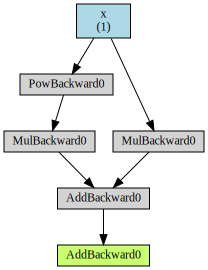

In [82]:
from torchviz import make_dot

x = torch.tensor([2.0], requires_grad=True)
a = torch.tensor([1.0])
b = torch.tensor([-2.0])
c = torch.tensor([1.0])

y = a * torch.pow(x, 2) + b * x + c
make_dot(y, params={'x':x})

### autograd()を使った高階微分
* 第一引数は微分される関数
* 第二引数はそれに関して微分する変数
* create_graphをTrueにすると計算グラフが作られるので、高階微分を計算できるようになる。

In [83]:
x = torch.tensor(0.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)
d = torch.tensor(5.0)
y = a * torch.pow(x, 3) + b * torch.pow(x, 2) + c * x + d

dy_dx = torch.autograd.grad(y, x, create_graph=True)[0]
print(dy_dx.data)

dy2_dx2 = torch.autograd.grad(dy_dx, x)[0]
print(dy2_dx2.data)

tensor(1.)
tensor(-4.)


### 多変数関数の偏微分とヘシアン

In [84]:
def func(x1, x2):
  return (x1 + 3 * x2) ** 2

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y = func(x1, x2)

dy_dx1, dy_dx2 = torch.autograd.grad(outputs=y, inputs=[x1, x2], create_graph=True)
print(dy_dx1.data, dy_dx2.data)
dy_dx1dx1, dy_dx1dx2 = torch.autograd.grad(outputs=dy_dx1, inputs=[x1, x2], retain_graph=True)
print(dy_dx1dx1.data, dy_dx1dx2.data)
dy_dx2dx1, dy_dx2dx2 = torch.autograd.grad(outputs=dy_dx2, inputs=[x1, x2])
print(dy_dx2dx1.data, dy_dx2dx2.data)

print(torch.autograd.functional.hessian(func, inputs=(x1, x2)))

tensor(14.) tensor(42.)
tensor(2.) tensor(6.)
tensor(6.) tensor(18.)


AttributeError: module 'torch.autograd' has no attribute 'functional'

## 04-03 自動微分を使った制約なし最適化

In [54]:
# f(x) = a * x ** 2 + b * x + c
def f(x, a=1.0, b=-2.0, c=1.0):
  return a * torch.pow(x, 2) + b * x + c

x = torch.tensor(10.0, requires_grad=True)
optimizer = torch.optim.SGD(params=[x], lr=0.1)

for i in range(1, 101):
  optimizer.zero_grad()
  y = f(x)
  y.backward()
  optimizer.step()
  if i % 5 == 0:
    print(f'iter {i} : f(x) = {y.data:.6f}, x = {x.data:.6f}')

iter 5 : f(x) = 13.589545, x = 3.949120
iter 10 : f(x) = 1.459167, x = 1.966368
iter 15 : f(x) = 0.156677, x = 1.316659
iter 20 : f(x) = 0.016823, x = 1.103763
iter 25 : f(x) = 0.001806, x = 1.034001
iter 30 : f(x) = 0.000194, x = 1.011142
iter 35 : f(x) = 0.000021, x = 1.003651
iter 40 : f(x) = 0.000002, x = 1.001196
iter 45 : f(x) = 0.000000, x = 1.000392
iter 50 : f(x) = 0.000000, x = 1.000128
iter 55 : f(x) = 0.000000, x = 1.000042
iter 60 : f(x) = 0.000000, x = 1.000014
iter 65 : f(x) = 0.000000, x = 1.000005
iter 70 : f(x) = 0.000000, x = 1.000001
iter 75 : f(x) = 0.000000, x = 1.000000
iter 80 : f(x) = 0.000000, x = 1.000000
iter 85 : f(x) = 0.000000, x = 1.000000
iter 90 : f(x) = 0.000000, x = 1.000000
iter 95 : f(x) = 0.000000, x = 1.000000
iter 100 : f(x) = 0.000000, x = 1.000000


# 課題4
* 関数$f(x_1,x_2)=x_1^2+x_2^2$の最小値と、$f(x_1,x_2)$がその最小値をとるときの$x_1$と$x_2$の値を、PyTorchの自動微分を使って求めよう。